# Importing the required modules

In [31]:
# Modules used for data handling and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set_style("whitegrid")

# Modules used for splitting the data into train, test, and validation sets.
import splitfolders
import os

# Modules used for randomisation.
import random as r

# Modules used for specifying type hints for function parameters.
from typing import Type

# Modules used for suppressing warnings.
import warnings 
warnings.filterwarnings('ignore')

# Modules used for model training and transfer learning
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.applications as cnns
from tensorflow.keras import Model

# Loading the dataset

In [46]:
class Dataset:

    def __init__(self, IMG_DIR : str, img_processor : Type[ImageProcessor], TRAIN : float, TEST : float, VAL : float):
        self.DIR = IMG_DIR
        self.img_preprocessor = img_processor
        self.class_dist = dict()
        self.TRAIN = TRAIN
        self.TEST = TEST
        self.VAL = VAL
        self.SPLIT_DEST = "../data/bloods-cells-splitted" 
    
    def __compute_class_distributions(self) -> None:
        for dirname in os.listdir(self.DIR):
            self.class_dist[dirname] = len(os.listdir(os.path.join(self.DIR, dirname)))

    def class_distribution(self) -> None:
        self.__compute_class_distributions()

        plt.figure(figsize=(10,10))
        plt.bar(self.class_dist.keys(),
        self.class_dist.values(),
        color=["crimson","red","orange","yellow"])
        plt.xticks(rotation=90)
        plt.title("Class Distribution of Cell Types dataset")
        plt.xlabel("Class Label")
        plt.ylabel("Frequency of class")
        plt.show()

    def show_samples(self) -> None:
        rows = 2
        columns = 4
        c = 0
        fig, axs = plt.subplots(rows, columns,figsize=(10,10))
        for dirname in os.listdir(self.DIR):
            img_path = r.choice(os.listdir(os.path.join(self.DIR, dirname)))
            image = mpimg.imread(os.path.join(self.DIR, dirname, img_path))
            axs[c//columns, c%columns].imshow(image)
            axs[c//columns, c%columns].set_title(dirname)
            c += 1
        fig.suptitle("Image Samples of Cell Classification dataset")
        plt.subplots_adjust(bottom=0.35, top=0.98, hspace=0.15)
        plt.show()

    def test_train_validation_split(self):
        assert (self.TRAIN + self.TEST + self.VAL) == 1

        splitfolders.ratio(input = self.DIR, 
                           output = self.SPLIT_DEST,
                           seed = 1337, ratio = (self.TRAIN, self.TEST, self.VAL), 
                           group_prefix = None, 
                           move = False)

In [47]:
cell_type = Dataset(IMG_DIR="../data/blood-cells", 
                    img_processor=ImageProcessor("a", "b", "c"),
                    TRAIN=0.8, TEST=0.1, VAL=0.1)

In [ ]:
cell_type.class_distribution()

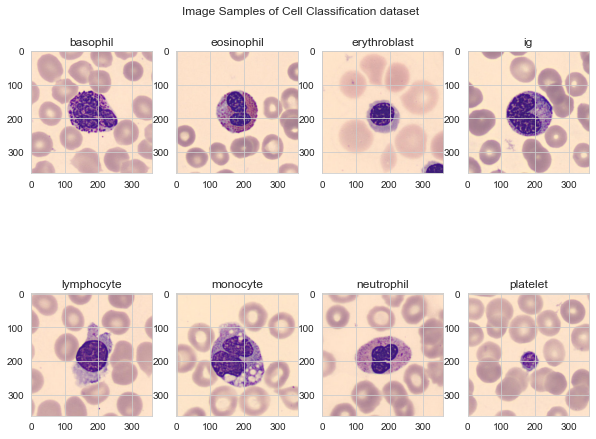

In [30]:
cell_type.show_samples()

# Image Processing

In [39]:
class ImageProcessor:

    def __init__(self, TRAIN_DIR : str, VAL_DIR : str, TEST_DIR : str):
        self.TRAIN_DIR = TRAIN_DIR
        self.VAL_DIR = VAL_DIR
        self.TEST_DIR = TEST_DIR
        self.train_gen = None
        self.test_gen = None
        self.val_gen = None

    def create_generators(self):
        self.train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
            preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
        )

        self.test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
            preprocessing_function=tf.keras.applications.resnet50.preprocess_input
        )

        self.val_gen =  tf.keras.preprocessing.image.ImageDataGenerator(
            preprocessing_function=tf.keras.applications.resnet50.preprocess_input
        )

    def get_images(self):
        train_images = self.train_gen.flow_from_directory(
            directory=self.TRAIN_DIR,
            target_size=(75, 75),
            color_mode='rgb',
            class_mode='categorical',
            batch_size=32,
            shuffle=True,
            seed=42,
            subset='training'
        )

        val_images = self.val_gen.flow_from_directory(
            directory=self.VAL_DIR,
            target_size=(75, 75),
            color_mode='rgb',
            class_mode='categorical',
            batch_size=32,
            shuffle=True,
            seed=42
        )

        test_images = self.test_gen.flow_from_directory(
            directory=self.TEST_DIR,
            target_size=(75, 75),
            color_mode='rgb',
            class_mode='categorical',
            batch_size=32,
            shuffle=False,
            seed=42
        )

        return train_images, val_images, test_images

# Model Building

In [5]:
class ModelBuilder:

    def __init__(self):
        pass

    def design_model(self):
        pass

    def compile_model(self):
        pass

    def fit_model(self):
        pass

    def visualize_history(self):
        pass

    def evaluate_model(self):
        pass

In [ ]:
class ModelEvaluator:

    def __init__(self, base_model):
        pass

    def show_classification_report(self):
        pass

# Conclusions